In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


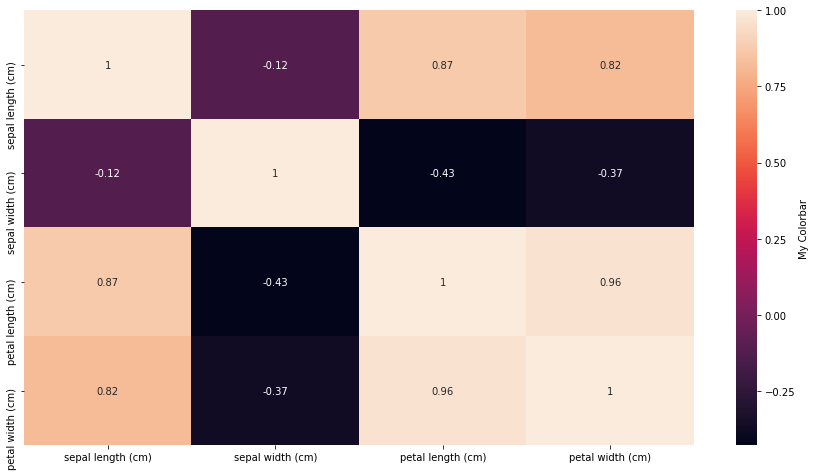

In [9]:
corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cbar_kws={'label': 'My Colorbar'})

In [10]:
df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

In [11]:
df["species"] = df["species"].cat.codes
df.dtypes


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                 int8
dtype: object

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
X = df.drop(['species'],axis=1)

In [14]:
y=df['species']
type(y)

pandas.core.series.Series

In [15]:
y = pd.DataFrame(y)
type(y)

pandas.core.frame.DataFrame

In [16]:
y = y.rename(columns={'0':'species'})

In [66]:
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [67]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [68]:
y_train.head()

,species
60,1
116,2
144,2
119,2
108,2


In [69]:
#from sklearn import cross_validation

In [175]:
clf = RandomForestClassifier(n_estimators=7)

In [176]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [177]:
clf.fit(X_train,y_train)

C:\Users\uib43221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [178]:
from sklearn import metrics



In [179]:
y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,2
1,1
2,0
3,2
4,0


In [180]:
metrics.confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
print("Accuracy is :" , accuracy_score(y_test,y_pred)*100)

Accuracy is : 97.77777777777777


In [183]:
Predicted = pd.concat([X_test,y_test],axis=1)

In [184]:
Predicted.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0


In [185]:
print(y_pred.head())
y_test.head()

   0
0  2
1  1
2  0
3  2
4  0


,species
114,2
62,1
33,0
107,2
7,0


In [186]:
Predicted = pd.concat([y_test,y_pred],axis=1)

In [187]:
Predicted.head()

,species,0
0,NaN,2.0
1,NaN,1.0
2,0.0,0.0
3,NaN,2.0
4,NaN,0.0


In [188]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.482285
petal width (cm)     0.438745
sepal length (cm)    0.066299
sepal width (cm)     0.012670
dtype: float64

In [189]:
import seaborn as sns

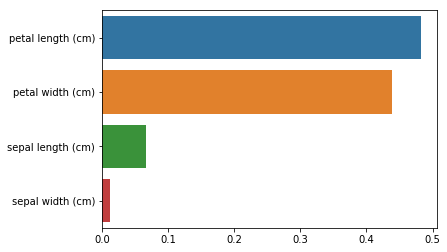

In [190]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.show()